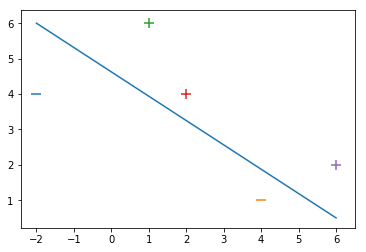

In [17]:
# Classifier: SVM (Support Vector Machine)
# Q: How it help us? A: find the decision boundary (hyperplane) which is a linear decision surface that splits the space into two parts
# Categories: supervised machine learning, binary classifier, sort of linear classification
# Q: How to use it ? A: Given 2 or more labeled classes of data, it acts as a discriminative classifier

#####################################################################
# Advantages:
# 1. Effective in high dimentional spaces
# 2. Stiil effect incases where number of dimensions is greater than number of samples
# 3. Flexible kernel funtion
# Disadvantage:
# 1. If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is critical
# 2. Using five-fold cross-validation (check with your dataset) 
######################################################################

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

x = np.array([[-2,4,-1], [4,1,-1], [1,6,-1], [2,4,-1], [6,2,-1]])

y = np.array([-1,-1,1,1,1])

for d, sample in enumerate(x):
    # Plot the negative samples (the first 2)
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples (the last 3)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

plt.plot([-2,6],[6,0.5])

In [18]:
# Minimizing the loss (loss function: Hinge loss)
# Optimizing the regularizer term
def svm_sgd_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (3 values)
    # Start with 0
    w = np.zeros(len(X[0]))
    #The learning rate
    eta = 1
    #how many iterations to train for
    epochs = 100000
    #store misclassifications so we can plot how they change over time
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        error = 0
        for i, x in enumerate(X):
            #misclassification case
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors, '|')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified')
    plt.show()
    
    return w

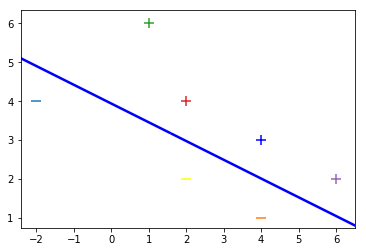

In [19]:
for d, sample in enumerate(x):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples
plt.scatter(2,2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4,3, s=120, marker='+', linewidths=2, color='blue')

# Print the optimal hyperplane calculated by svm_sgd()
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
x,Y,U,V = zip(*x2x3)
ax = plt.gca()
ax.quiver(x,Y,U,V,scale=1, color='blue')

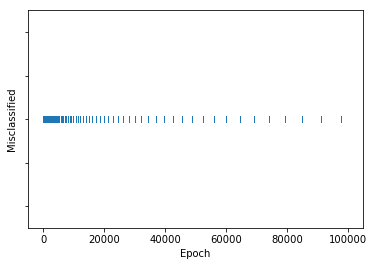

In [25]:
x = np.array([[-2,4,-1], [4,1,-1], [1,6,-1], [2,4,-1], [6,2,-1]])

y = np.array([-1,-1,1,1,1])

# Errors value decrease everytime
w = svm_sgd_plot(x,y)